<a href="https://colab.research.google.com/github/Oktavian19/2341720117_ML_2025/blob/main/JS09/TP_JS09_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Model Klasifikasi kNN untuk jenis suara male dan fenale

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('/content/drive/MyDrive/asset/ml/voice.csv')

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [67]:
print(df['label'].value_counts())

label
male      1584
female    1584
Name: count, dtype: int64


In [68]:
label_baru = {
    'male': 1,
    'female': 0
}

df['label'] = df['label'].map(label_baru)

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [69]:
X = df.drop('label', axis=1)
y = df['label']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [72]:
y_pred = knn.predict(X_test_scaled)

# Results
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

acc, report

(0.9810725552050473,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       297\n           1       0.98      0.98      0.98       337\n\n    accuracy                           0.98       634\n   macro avg       0.98      0.98      0.98       634\nweighted avg       0.98      0.98      0.98       634\n')

# 2. Pemilihan fitur paling optimal untuk hasil terbaik

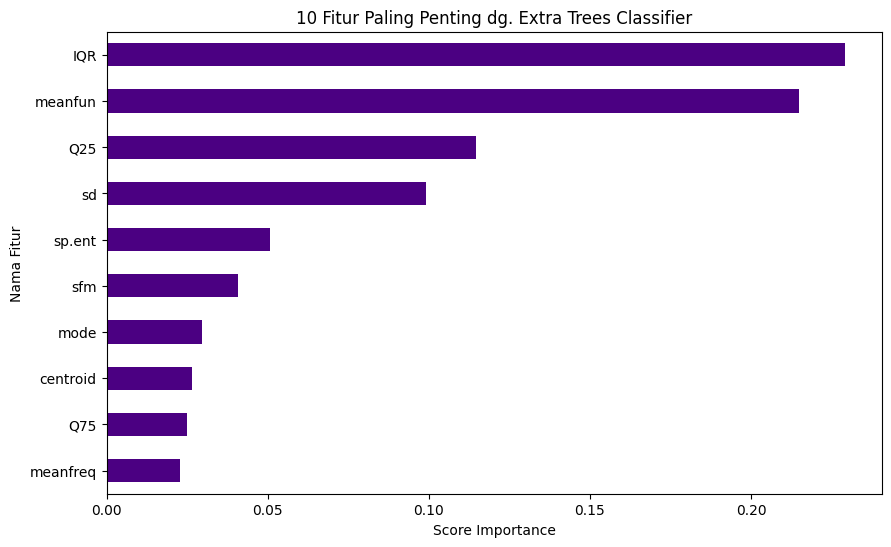

In [73]:
X = df.drop('label', axis=1)
y = df['label']
LaEn = LabelEncoder()
y = LaEn.fit_transform(y)

# Feature Importance Extra Trees Classifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

# Nilai importance
f_importances = pd.Series(model.feature_importances_, index=X.columns)

# Visualisasi 10 Fitur Terbaik
plt.figure(figsize=(10, 6))
f_importances.nlargest(10).plot(kind='barh', color='indigo')
plt.title('10 Fitur Paling Penting dg. Extra Trees Classifier')
plt.xlabel('Score Importance')
plt.ylabel('Nama Fitur')
plt.gca().invert_yaxis()
plt.show()

In [74]:
selected_features = ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent']

X = df[selected_features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi dengan {len(selected_features)} Fitur Terbaik: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Akurasi dengan 5 Fitur Terbaik: 98.26%


# 3. Nilai akurasi terbaik

<Axes: >

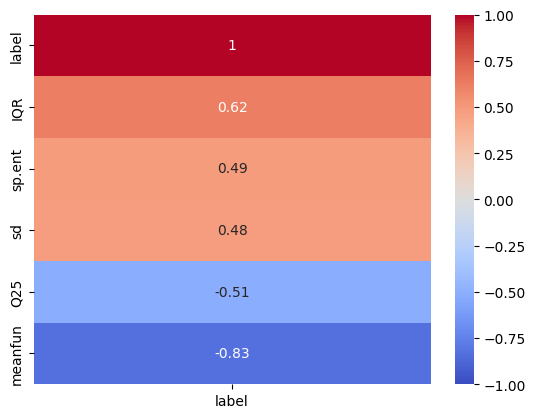

In [77]:
# Correlation
selected_plus_target = selected_features + ['label']
corr = df[selected_plus_target].corr()
sns.heatmap(corr[['label']].sort_values(by='label', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1,)

Berdasarkan Feature Importance Grafik dengan menggunakan ExtraTreesClassifier di soal sebelumnya, hasil menunjukkan 5 fitur tersebut memiliki kontribusi terbesar dalam membedakan suara

Sedangkan dari korealsinya dengan label menunjukkan seberapa kuat hubungan fitur dengan label yang dicoba (male, female)